In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sports= "SPD.csv"
sport= 'SPD(League only).csv'

df = pd.read_csv(sports,index_col=0, parse_dates=True)
dfd = pd.read_csv(sport)


dfd=dfd.sort_values(by=['League'])

dfd

,Owner,Team,League,Recipient,Amount,Election Year,Party,City,State
1396,Laura Ricketts,Chicago Cubs,MLB,SCHAKOWSKY FOR CONGRESS,4500,2018,Democrat,Chicago,Illinois
1250,John Stanton,Seattle Mariners,MLB,Adam Smith for Congress Committee,2700,2018,Democrat,Seattle,Washington
1249,John Stanton,Seattle Mariners,MLB,Hatch Election Committee Inc.,2700,2018,Republican,Seattle,Washington
1248,John Stanton,Seattle Mariners,MLB,Office of the Commissioner of Major League Bas...,5000,2020,Bipartisan,Seattle,Washington
1247,John Stanton,Seattle Mariners,MLB,Office of the Commissioner of Major League Bas...,10000,2018,Bipartisan,Seattle,Washington
...,...,...,...,...,...,...,...,...,...
1134,John Rogers,Chicago Sky,WNBA,RUSS FOR WISCONSIN,5400,2016,Democrat,Chicago,Illinois
1133,John Rogers,Chicago Sky,WNBA,ROBIN KELLY FOR CONGRESS,5400,2016,Democrat,Chicago,Illinois
1132,John Rogers,Chicago Sky,WNBA,LON JOHNSON FOR CONGRESS,5400,2016,Democrat,Chicago,Illinois
103,Bill Hornbuckle (MGM Resorts International),Las Vegas Aces,WNBA,NEVADANS FOR STEVEN HORSFORD,5600,2020,Democrat,Las Vegas,Neveda


In [2]:
dfd['League'].str.strip()

1396     MLB
1250     MLB
1249     MLB
1248     MLB
1247     MLB
        ... 
1134    WNBA
1133    WNBA
1132    WNBA
103     WNBA
3279    WNBA
Name: League, Length: 3280, dtype: object

In [3]:
dfd["Election Year"]= dfd["Election Year"].astype(object)
df.head(20)
dfd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3280 entries, 1396 to 3279
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Owner          3280 non-null   object
 1   Team           3280 non-null   object
 2   League         3280 non-null   object
 3   Recipient      3280 non-null   object
 4   Amount         3280 non-null   int64 
 5   Election Year  3280 non-null   object
 6   Party          3266 non-null   object
 7   City           3280 non-null   object
 8   State          3280 non-null   object
dtypes: int64(1), object(8)
memory usage: 256.2+ KB


In [4]:
df["Amount"].sum()
dfyr= df.groupby(['Election Year'],as_index=False)['Amount'].sum()
dfyr

,Election Year,Amount
0,2016,17679696.0
1,2018,16932768.0
2,2020,12366233.0


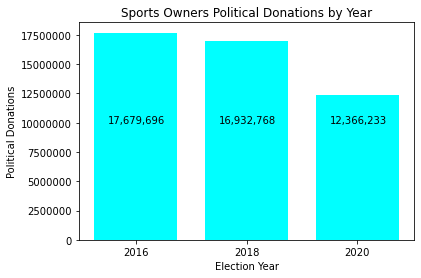

In [5]:
x = dfyr ['Election Year']
plt.bar(dfyr['Election Year'],dfyr['Amount'],color ="cyan", width=1.5)
plt.ticklabel_format(axis="y",style='plain')
plt.xticks(np.arange(min(x),max(x)+1, 2.0))
plt.xlabel('Election Year')
plt.ylabel('Political Donations')
plt.title('Sports Owners Political Donations by Year')
bbox = dict(boxstyle ="round", fc ="purple")
plt.annotate("17,679,696",xy=(2016,17500000),xytext=(2015.5,10000000))
plt.annotate("16,932,768",xy=(2018,16932768),xytext=(2017.5,10000000))
plt.annotate("12,366,233",xy=(2016,12366233),xytext=(2019.5,10000000))
plt.show()

In [6]:
dfmlb2= dfd.loc[dfd["League"]=="MLB"]
dfmlb= dfmlb2.groupby(['Election Year'], as_index = False)['Amount'].sum()
dfmlb

,Election Year,Amount
0,2016,7539533
1,2018,8972842
2,2020,5167673


In [7]:
dfnba2= dfd.loc[dfd["League"]=="NBA"]
dfnba= dfnba2.groupby(['Election Year'], as_index = False)['Amount'].sum()
dfnba

,Election Year,Amount
0,2016,4694789
1,2018,4120278
2,2020,3211820


In [8]:
dfnfl2= dfd.loc[dfd["League"]=="NFL"]
dfnfl= dfnfl2.groupby(['Election Year'], as_index = False)['Amount'].sum()
dfnfl

,Election Year,Amount
0,2016,2989830
1,2018,2047405
2,2020,1591885


In [9]:
dfwnba2= dfd.loc[dfd["League"]=="WNBA"]
dfwnba= dfwnba2.groupby(['Election Year'], as_index = False)['Amount'].sum()
dfwnba

,Election Year,Amount
0,2016,1077029
1,2018,1051553
2,2020,1033873


In [10]:
dfnhl2= dfd.loc[dfd["League"]=="NHL"]
dfnhl= dfnhl2.groupby(['Election Year'], as_index = False)['Amount'].sum()
dfnhl

,Election Year,Amount
0,2016,3158003
1,2018,3245250
2,2020,2684362


In [11]:
dfnas2= dfd.loc[dfd["League"]=="NASCAR"]
dfnas= dfnas2.groupby(['Election Year'], as_index = False)['Amount'].sum()
dfnas

,Election Year,Amount
0,2016,370383
1,2018,223740
2,2020,136970


([<matplotlib.axis.XTick at 0x7fe38e4d78b0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

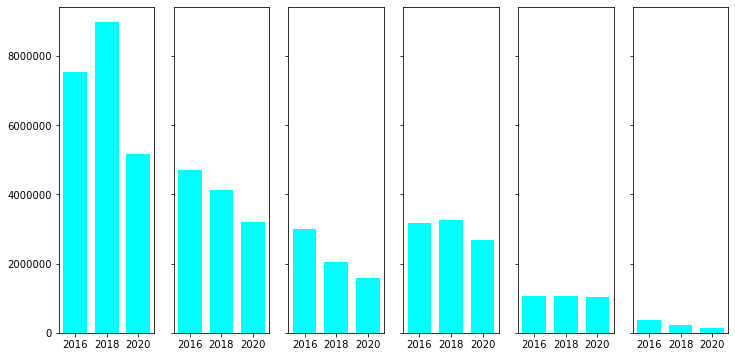

In [12]:
x = dfyr ['Election Year']
fig,ax= plt.subplots(1,6,sharex=True, sharey=True,figsize=(12,6))
ax[0].bar(dfmlb['Election Year'],dfmlb['Amount'],color ="cyan", width=1.5)
ax[1].bar(dfnba['Election Year'],dfnba['Amount'],color ="cyan", width=1.5)
ax[2].bar(dfnfl['Election Year'],dfnfl['Amount'],color ="cyan", width=1.5)
ax[3].bar(dfnhl['Election Year'],dfnhl['Amount'],color ="cyan", width=1.5)
ax[4].bar(dfwnba['Election Year'],dfwnba['Amount'],color ="cyan", width=1.5)
ax[5].bar(dfnas['Election Year'],dfnas['Amount'],color ="cyan", width=1.5)
ax[0].ticklabel_format(axis="y",style='plain')

plt.show
plt.sca(ax[0])



plt.xticks(np.arange(min(x),max(x)+1, 2.0))
# Put percentage change by year in each subsequent bar
# above each bar put the percent of all donation for the year
# find out how to change annotation text colors
# find out how to remove graph lines to have open space for text in last 5 graphs
# create scatter plot teams x= number of donations y= total $ amount of donations

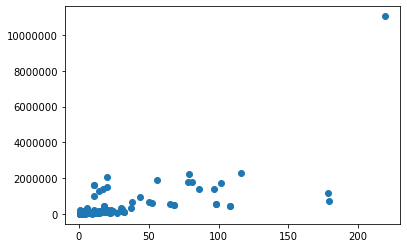

In [13]:
x=dfd.groupby(["Team"],as_index=True)['Amount'].count()
y=dfd.groupby(["Team"],as_index=True)["Amount"].sum()
plt.scatter(x,y)
plt.ticklabel_format(axis="y",style='plain')

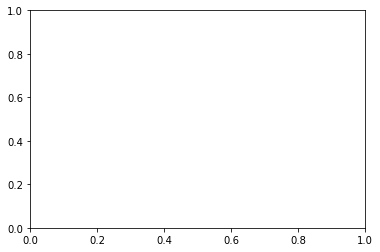

In [14]:

plt.ticklabel_format(axis="y",style='plain')

In [15]:
dfsc=dfd.groupby(["Team",'League'],as_index=False)['Amount'].count()
dfsc2=dfd.groupby(["Team",'League'],as_index=False)['Amount'].sum()
dfsc2=dfsc2.sort_values(by=['League','Team'])
dfsc=dfsc.sort_values(by=['League','Team'])

In [16]:
dfsc

,Team,League,Amount
3,Arizona Diamondbacks,MLB,86
7,Baltimore Orioles,MLB,20
11,Boston Red Sox,MLB,20
19,Chicago Cubs,MLB,56
21,Chicago White Sox,MLB,78
...,...,...,...
66,Los Angeles Sparks,WNBA,6
72,Minnesota Lynx,WNBA,32
96,Phoenix Mercury,WNBA,18
114,Seattle Storm,WNBA,27


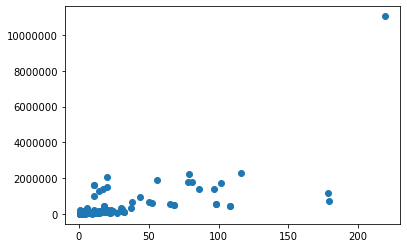

In [18]:
x=dfd.groupby(["Team"],as_index=True)['Amount'].count()
y=dfsc2.groupby(["Team"],as_index=True)["Amount"].sum()
plt.scatter(x,y)
plt.ticklabel_format(axis="y",style='plain')
#make scatterplot without san francisco giants to show graph with and without top donor